In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [92]:

files=glob.glob('./data/*.csv')
files

['./data/Arranged grid load - Nov 18.csv',
 './data/Arranged grid load - Nov 19.csv',
 './data/Arranged grid load - Sept 19.csv',
 './data/Arranged grid load - Sept 18.csv',
 './data/Arranged grid load - Jun 19.csv',
 './data/Arranged grid load - April 19.csv',
 './data/Arranged grid load - March 19.csv',
 './data/Arranged grid load - Jul 19.csv',
 './data/Arranged grid load - Jan 19.csv',
 './data/Arranged grid load - Aug 19.csv',
 './data/Arranged grid load - May 19.csv',
 './data/Arranged grid load - Feb 19.csv',
 './data/Arranged grid load - Dec 18.csv',
 './data/Arranged grid load - Oct 19.csv',
 './data/Arranged grid load - Oct 18.csv']

In [93]:
lst=[pd.read_csv(x) for x in files]

In [94]:
x=pd.read_csv(f1[0])

In [95]:
Data=pd.concat(lst)

In [96]:
Data.dtypes

DATE          object
TIME          object
GRID LOAD    float64
dtype: object

In [97]:
Data['DATE']=pd.to_datetime(Data['DATE'])
Data['TIME']=pd.to_timedelta(Data['TIME'],unit='s')
Data.index=Data["DATE"] + Data["TIME"]


In [98]:
Data.isna().sum()/Data.shape[0]

DATE         0.000000
TIME         0.000000
GRID LOAD    0.061404
dtype: float64

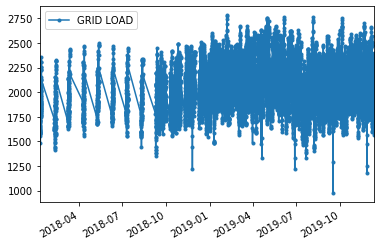

In [192]:
Data.plot(y='GRID LOAD',style='.-')

In [138]:
#there was an outlier with GRID LOAD=0.0
Data[Data['GRID LOAD']<500.0]

,DATE,TIME,GRID LOAD


In [137]:
#removing the outlier
Data.loc['2019-09-21 19:00:00']=np.nan

In [140]:
Data['GRID LOAD']=Data['GRID LOAD'].interpolate()

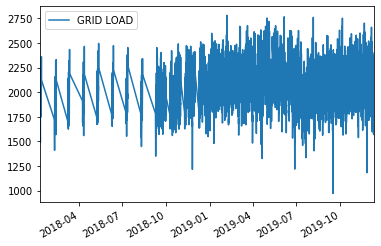

In [191]:
Data.plot(y='GRID LOAD')

In [178]:
Data['Month']=Data.index.month#.apply(lambda x:np.sin(x))
Data['Quarter']=Data.index.quarter#.apply(lambda x:np.sin(x))
Data['Dayofweek']=Data.index.dayofweek#.apply(lambda x:np.sin(x))
Data['HourofDay']=Data.index.hour#.apply(lambda x:np.sin(x))
Data['DayofMonth']=Data.index.day#.apply(lambda x:np.sin(x))
Data['Dayoftheyear']=Data.index.dayofyear#.apply(lambda x:np.sin(x))
Data['Monday']=Data.index.dayofweek
Data['Monday']=Data['Monday'].apply(lambda x: 1 if x==0 else 0)
Data['Tuesday']=Data.index.dayofweek
Data['Tuesday']=Data['Tuesday'].apply(lambda x: 1 if x==1 else 0)
Data['Wednesday']=Data.index.dayofweek
Data['Wednesday']=Data['Wednesday'].apply(lambda x: 1 if x==2 else 0)
Data['Thursday']=Data.index.dayofweek
Data['Thursday']=Data['Thursday'].apply(lambda x: 1 if x==3 else 0)
Data['Friday']=Data.index.dayofweek
Data['Friday']=Data['Friday'].apply(lambda x: 1 if x==4 else 0)
Data['Saturday']=Data.index.dayofweek
Data['Saturday']=Data['Saturday'].apply(lambda x: 1 if x==5 else 0)
Data['Sunday']=Data.index.dayofweek
Data['Sunday']=Data['Sunday'].apply(lambda x: 1 if x==5 else 0)

In [179]:
Data.columns

Index(['DATE', 'TIME', 'GRID LOAD', 'Month', 'Quarter', 'Dayofweek',
       'HourofDay', 'DayofMonth', 'Dayoftheyear', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

In [189]:
Data.sort_index(inplace=True)

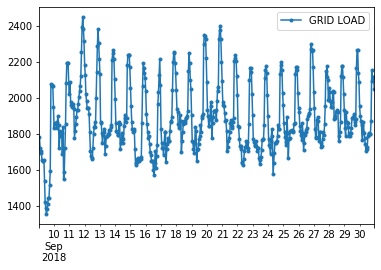

In [199]:
Data['2018-9':'2018-9'].plot(y='GRID LOAD',style='.-')

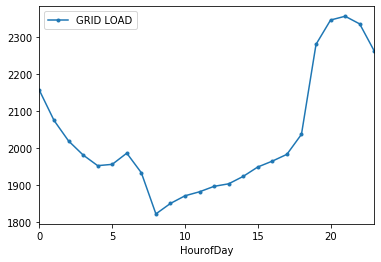

In [206]:
Data.groupby(['HourofDay']).mean().plot(y='GRID LOAD',style='.-')

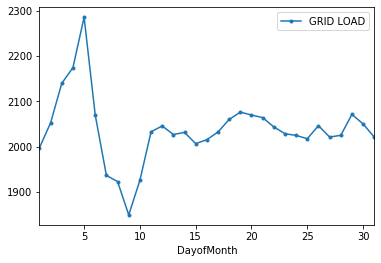

In [207]:
Data.groupby(['DayofMonth']).mean().plot(y='GRID LOAD',style='.-')

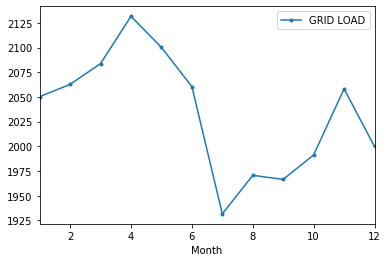

In [208]:
Data.groupby(['Month']).mean().plot(y='GRID LOAD',style='.-')

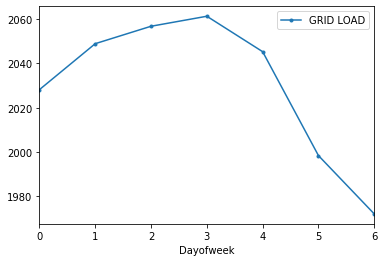

In [209]:
Data.groupby(['Dayofweek']).mean().plot(y='GRID LOAD',style='.-')

In [210]:
#'nighthours','peakNoActivity','earlymorning'
peakhours=[0,19,20,21,22,23]
Data['peakload']=Data['HourofDay'].apply(lambda x: 1 if x in peakhours else 0)
nighthours=[1,2,3,4,5,6,7,14,15,16,17,18]#nighthours
Data['mediumload']=Data['HourofDay'].apply(lambda x: 1 if x in nighthours else 0)
peakNoActivity=[8,9,10,11,12,13]
Data['minload']=Data['HourofDay'].apply(lambda x: 1 if x in peakNoActivity else 0)

#peak load durning the days in month
peakdayofmonth=[3,4,5]
Data['peakdayofmonth']=Data['DayofMonth'].apply(lambda x: 1 if x in peakdayofmonth else 0)
mindayofmonth=[7,8,9,10]
Data['mindayofmonth']=Data['DayofMonth'].apply(lambda x: 1 if x in mindayofmonth else 0)
normaldayofmonth=[1,2,6,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
Data['normaldayofmonth']=Data['DayofMonth'].apply(lambda x: 1 if x in normaldayofmonth else 0)


In [212]:
Data.to_pickle("oneyeardata.pkl")

In [ ]:
trainD=Data['2018-9':'2019-10'].copy(deep=True)
testD=Data['2019-11':].copy(deep=True)

[0,
 1,
 2,
 4,
 12,
 13,
 14,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 44,
 47,
 49,
 73,
 97,
 121,
 145,
 169,
 193,
 241]

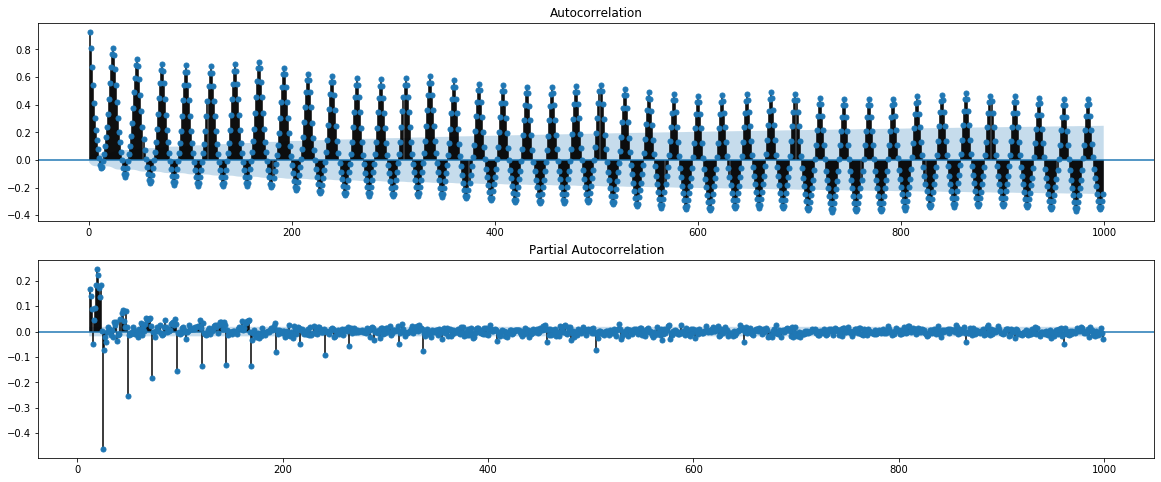

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=[20,8])
plt.subplot(211)
plot_acf(Data['GRID LOAD'].values, ax=plt.gca(),lags=range(1,1000))
plt.subplot(212)
plot_pacf(Data['GRID LOAD'].values, ax=plt.gca(),lags=range(12,1000))
plt.show()

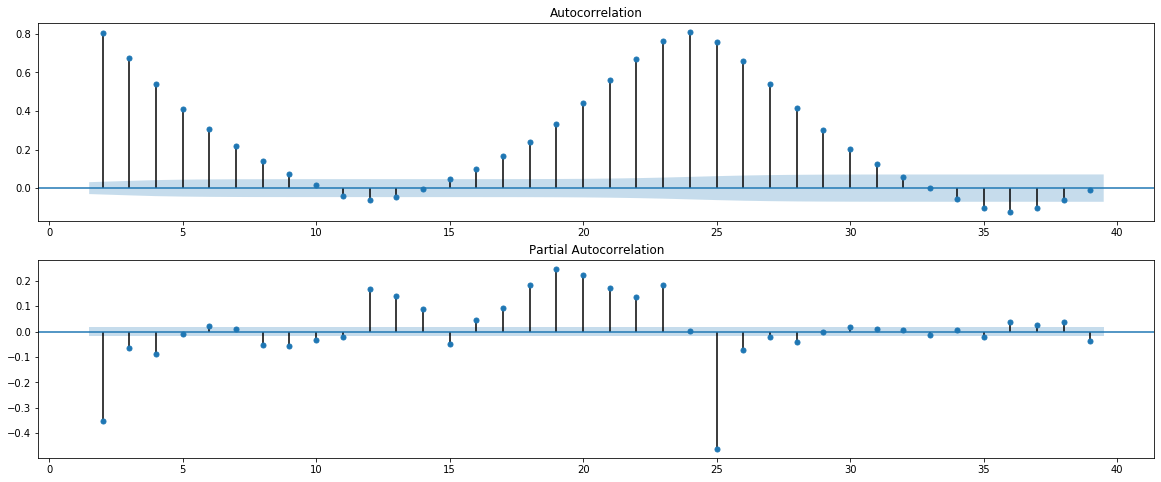

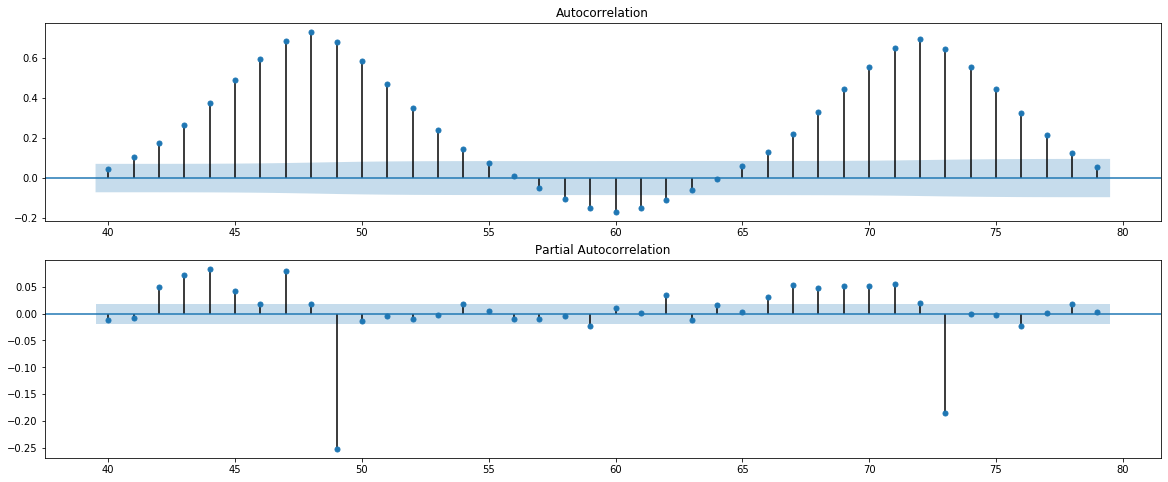

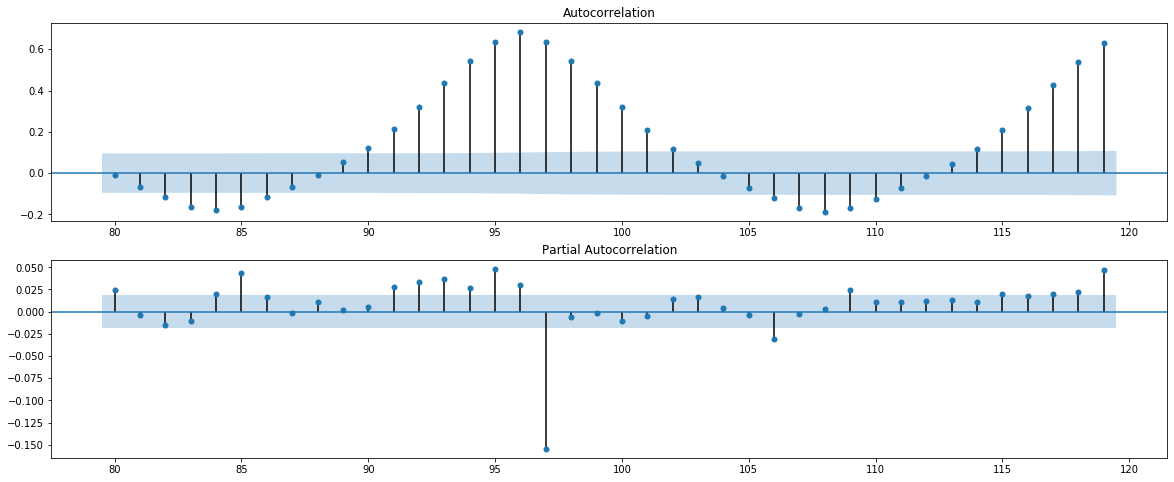

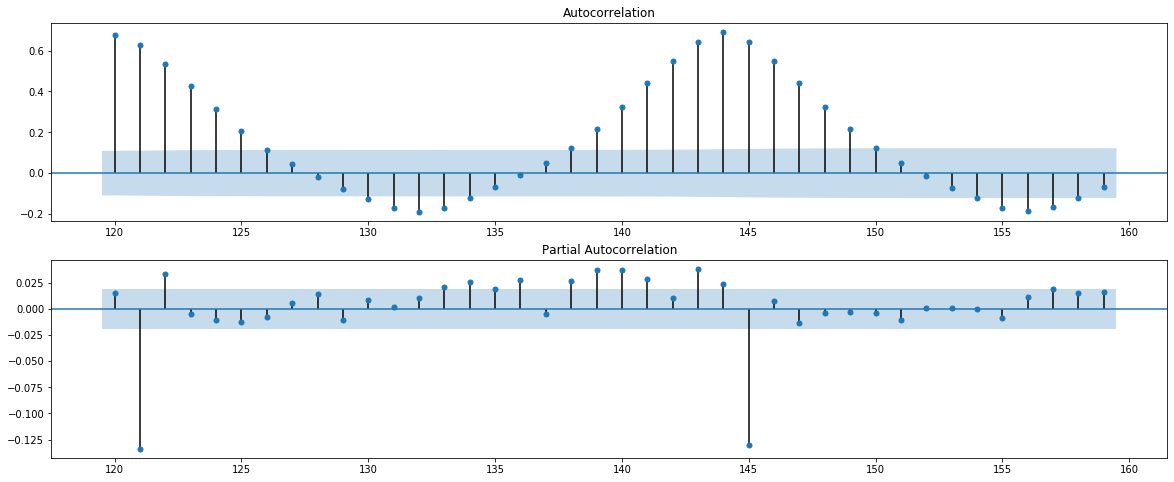

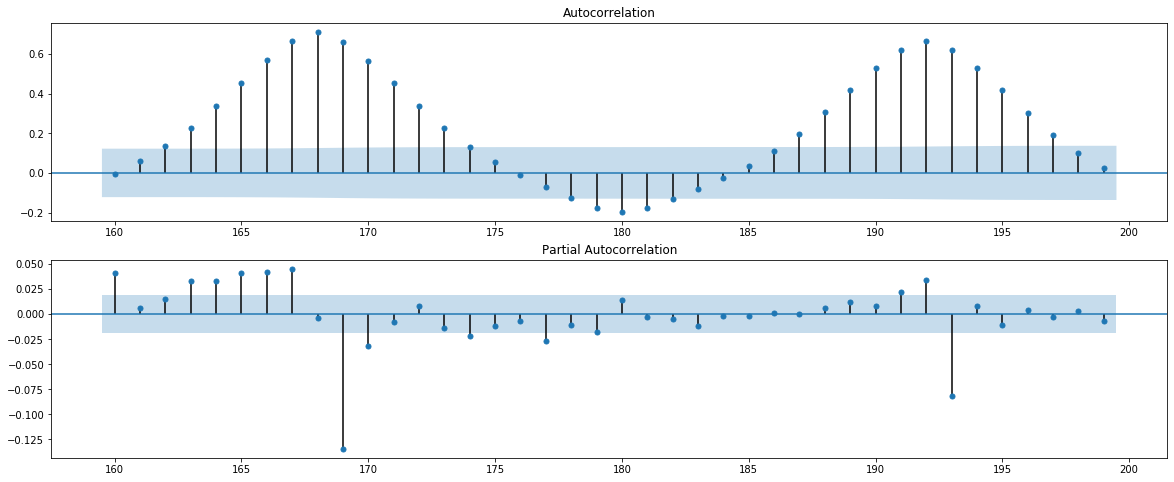

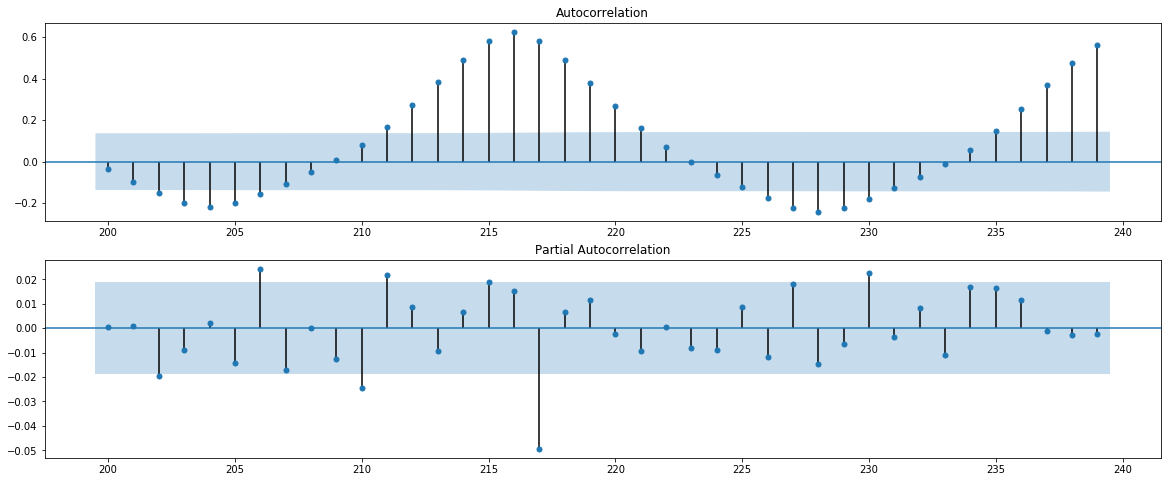

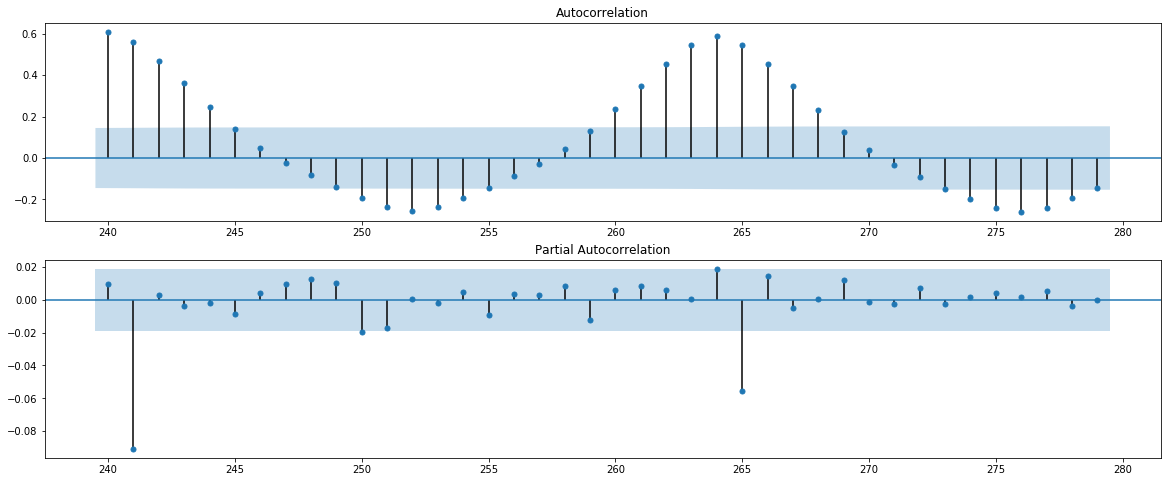

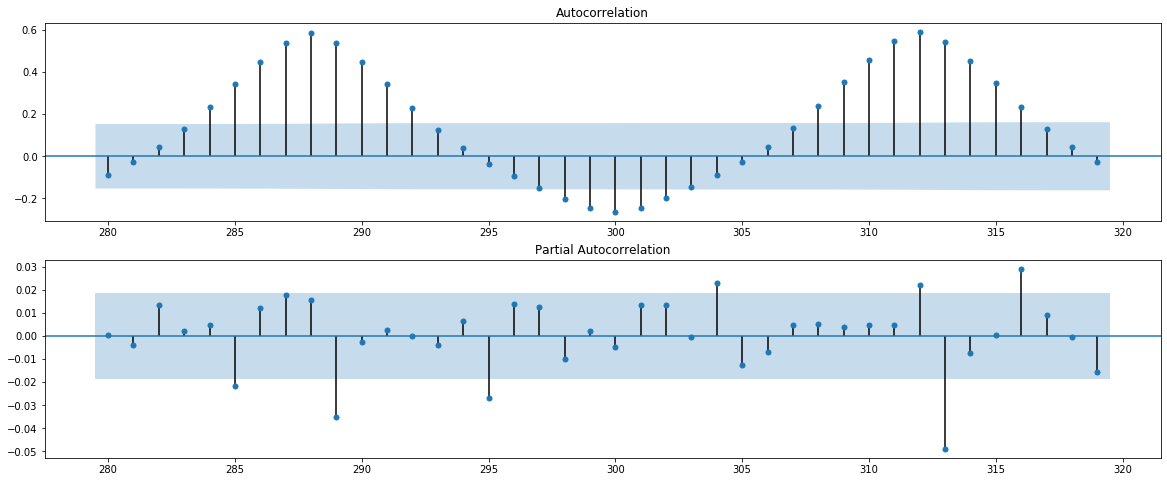

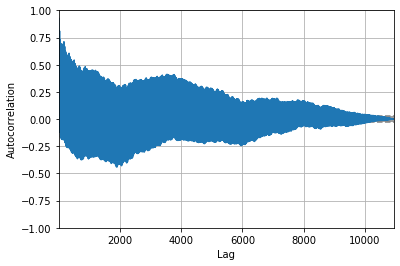

,DATE,TIME,GRID LOAD,shift-0,shift-1,shift-2,shift-3,shift-4,shift-8,shift-9,...,shift-97,shift-121,shift-145,shift-169,shift-193,shift-241,shift-265,shift-337,shift-505,shift-961
2018-09-11 01:00:00,2018-09-11,01:00:00,2087.090,2087.090,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-11 02:00:00,2018-09-11,02:00:00,1977.530,1977.530,2087.090,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-11 03:00:00,2018-09-11,03:00:00,1962.675,1962.675,1977.530,2087.090,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-11 04:00:00,2018-09-11,04:00:00,1947.820,1947.820,1962.675,1977.530,2087.09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-11 05:00:00,2018-09-11,05:00:00,1964.850,1964.850,1947.820,1962.675,1977.53,2087.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


9215